In [3]:
!pip install -q tfds-nightly

In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [5]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [6]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ6I4WY/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ6I4WY/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ6I4WY/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [7]:
encoder = info.features['text'].encoder

In [8]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [9]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [10]:
assert original_string == sample_string

In [11]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [13]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [15]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [16]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 44s 113ms/step - loss: 0.6345 - accuracy: 0.5762 - val_loss: 0.4850 - val_accuracy: 0.7698
Epoch 2/10
391/391 [==============================] - 43s 111ms/step - loss: 0.3472 - accuracy: 0.8563 - val_loss: 0.3496 - val_accuracy: 0.8438
Epoch 3/10
391/391 [==============================] - 44s 112ms/step - loss: 0.2571 - accuracy: 0.9012 - val_loss: 0.3459 - val_accuracy: 0.8745
Epoch 4/10
391/391 [==============================] - 44s 113ms/step - loss: 0.2142 - accuracy: 0.9210 - val_loss: 0.3285 - val_accuracy: 0.8620
Epoch 5/10
391/391 [==============================] - 44s 113ms/step - loss: 0.1928 - accuracy: 0.9305 - val_loss: 0.3684 - val_accuracy: 0.8240
Epoch 6/10
391/391 [==============================] - 44s 113ms/step - loss: 0.1657 - accuracy: 0.9415 - val_loss: 0.3490 - val_accuracy: 0.8609
Epoch 7/10
391/391 [==============================] - 44s 114ms/step - loss: 0.1469 - accuracy: 0.9490 - val_loss: 0.3880 - val_ac

In [17]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 17s 42ms/step - loss: 0.4468 - accuracy: 0.85860s - los
Test Loss: 0.4468163251876831
Test Accuracy: 0.8586400151252747


In [18]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [19]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [20]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.15917073]]


In [21]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-0.08836721]]


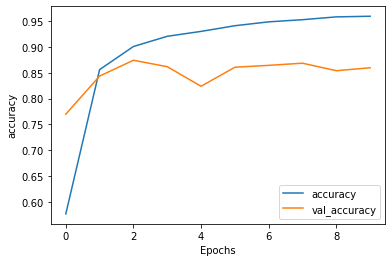

In [22]:
plot_graphs(history, 'accuracy')

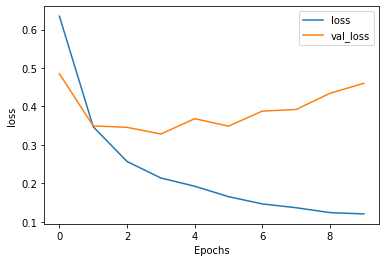

In [23]:
plot_graphs(history, 'loss')

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [25]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [26]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 78s 200ms/step - loss: 0.6480 - accuracy: 0.5654 - val_loss: 0.4581 - val_accuracy: 0.8042
Epoch 2/10
391/391 [==============================] - 78s 200ms/step - loss: 0.3879 - accuracy: 0.8415 - val_loss: 0.3568 - val_accuracy: 0.8594
Epoch 3/10
391/391 [==============================] - 79s 201ms/step - loss: 0.2772 - accuracy: 0.8992 - val_loss: 0.3546 - val_accuracy: 0.8599
Epoch 4/10
391/391 [==============================] - 78s 199ms/step - loss: 0.2262 - accuracy: 0.9226 - val_loss: 0.3539 - val_accuracy: 0.8542
Epoch 5/10
391/391 [==============================] - 78s 200ms/step - loss: 0.1928 - accuracy: 0.9362 - val_loss: 0.3898 - val_accuracy: 0.8495
Epoch 6/10
391/391 [==============================] - 79s 201ms/step - loss: 0.1618 - accuracy: 0.9510 - val_loss: 0.3938 - val_accuracy: 0.8615
Epoch 7/10
391/391 [==============================] - 78s 200ms/step - loss: 0.1415 - accuracy: 0.9589 - val_loss: 0.4309 - val_ac

In [27]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 30s 76ms/step - loss: 0.5025 - accuracy: 0.8437
Test Loss: 0.5024567246437073
Test Accuracy: 0.843720018863678


In [28]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-2.0623515]]


In [29]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-2.6745691]]


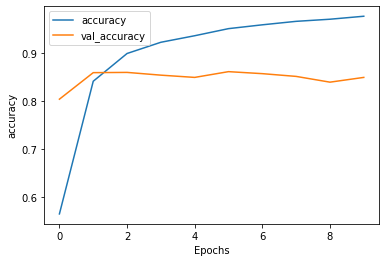

In [30]:
plot_graphs(history, 'accuracy')

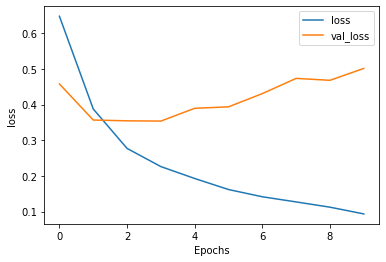

In [31]:
plot_graphs(history, 'loss')